<a href="https://www.kaggle.com/code/ishmaelnjihia/submitcat2?scriptVersionId=112324950" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



/kaggle/input/social-network-ads/Social_Network_Ads.csv


In [2]:
#Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
#Importing the dataset
dataset = pd.read_csv('/kaggle/input/social-network-ads/Social_Network_Ads.csv')
X = dataset.iloc[:,[-1, 1]].values
y = dataset.iloc[:, 1].values


In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

X_test

array([[     0,  87000],
       [     0,  50000],
       [     0,  75000],
       [     0,  79000],
       [     0,  50000],
       [     0,  20000],
       [     0,  15000],
       [     1, 144000],
       [     0,  68000],
       [     0,  43000],
       [     0,  49000],
       [     0,  55000],
       [     0,  55000],
       [     0,  77000],
       [     0,  86000],
       [     0, 117000],
       [     0,  77000],
       [     0,  85000],
       [     1, 130000],
       [     0,  22000],
       [     0,  47000],
       [     1, 144000],
       [     0,  51000],
       [     1, 105000],
       [     0,  28000],
       [     1, 141000],
       [     0,  87000],
       [     0,  80000],
       [     0,  62000],
       [     0,  86000],
       [     0,  88000],
       [     1,  79000],
       [     1,  60000],
       [     0,  53000],
       [     0,  58000],
       [     0,  52000],
       [     0,  81000],
       [     0,  43000],
       [     0,  34000],
       [     1,  36000],


In [5]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [6]:
#Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [7]:
#Predicting the Test set results

y_pred = classifier.predict(X_test)
y_pred

array([ 72000,  72000,  72000,  72000,  72000,  23000,  23000, 134000,
        72000,  59000,  72000,  72000,  72000,  72000,  72000,  80000,
        72000,  72000, 134000,  23000,  72000, 134000,  72000, 108000,
        23000, 134000,  72000,  72000,  72000,  72000,  72000,  88000,
        26000,  72000,  72000,  72000,  72000,  59000,  59000,  23000,
        72000,  72000,  72000,  23000, 108000,  72000,  72000,  88000,
        23000,  88000, 134000,  23000,  72000,  80000,  88000,  23000,
        72000,  72000,  23000,  23000,  23000,  23000,  72000,  88000,
        23000,  88000,  72000,  72000,  72000,  72000, 134000,  72000,
        72000,  23000,  72000,  72000,  72000,  72000,  23000, 108000,
       134000,  72000,  72000,  59000,  23000,  88000,  72000, 134000,
        23000,  72000,  72000, 134000,  72000,  59000,  72000,  88000,
        72000,  23000,  88000, 108000])

In [8]:
#Making the Confusion Matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

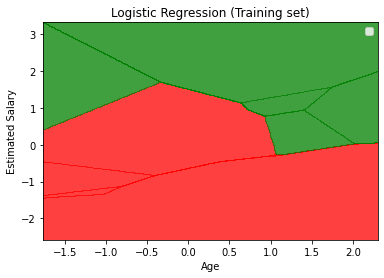

In [9]:
#Visualising the Training set results

from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
#for i, j in enumerate(np.unique(y_set)):
    #plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                #c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

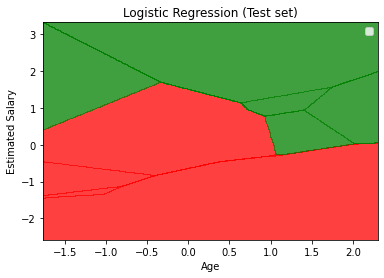

In [10]:
#Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
#for i, j in enumerate(np.unique(y_set)):
    #plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                #c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()